In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [20]:
# Load dataset
df = pd.read_csv("../data/processed_news.csv")

In [21]:
# Encode category labels
category_mapping = {"Fake": 0, "Real": 1, "Unverified": 2}
df["category"] = df["category"].map(category_mapping)

/var/folders/bq/9z5191zj2z1b8j21pdrkhv_c0000gn/T/ipykernel_81571/2042646103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["category"], palette="coolwarm")


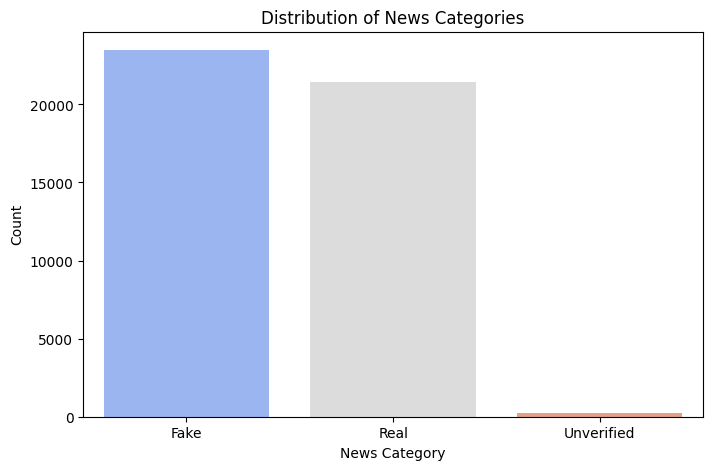

In [22]:
### 📌 1. Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["category"], palette="coolwarm")
plt.xticks(ticks=[0, 1, 2], labels=["Fake", "Real", "Unverified"])
plt.title("Distribution of News Categories")
plt.xlabel("News Category")
plt.ylabel("Count")
plt.savefig("class_distribution.png")  # Save graph
plt.show()

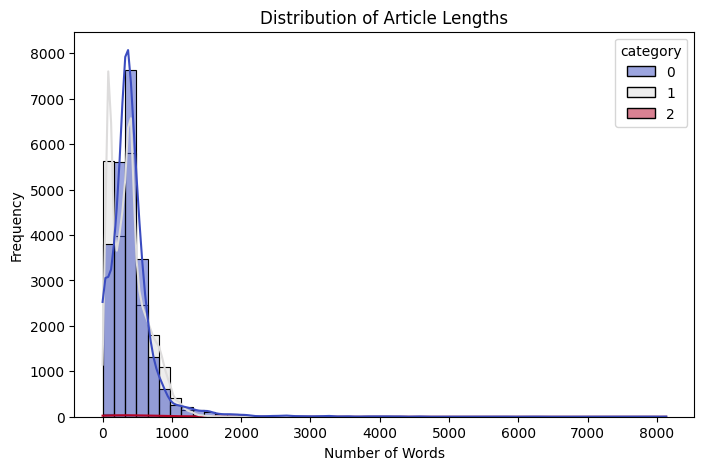

In [23]:
### 📌 2. Article Length Distribution
df["content_length"] = df["content"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df, x="content_length", hue="category", bins=50, kde=True, palette="coolwarm")
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig("article_length_distribution.png")
plt.show()

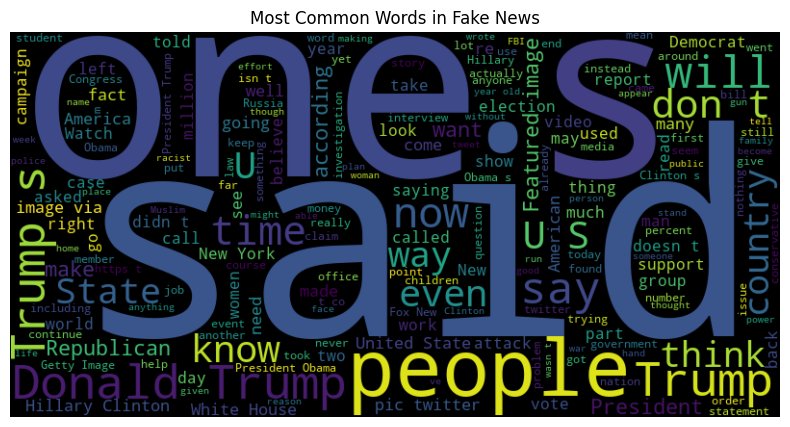

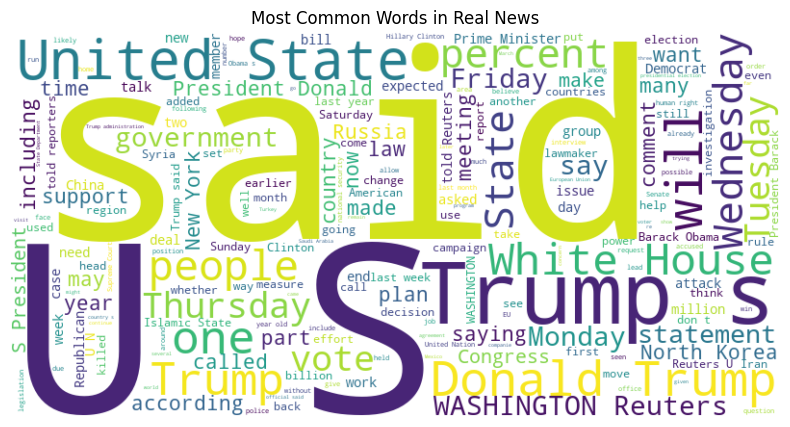

In [24]:
### 📌 3. Most Common Words (Word Cloud)
fake_text = " ".join(df[df["category"] == 0]["content"].astype(str))
real_text = " ".join(df[df["category"] == 1]["content"].astype(str))

fake_wordcloud = WordCloud(width=800, height=400, background_color="black").generate(fake_text)
real_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(fake_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fake News")
plt.savefig("fake_news_wordcloud.png")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(real_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real News")
plt.savefig("real_news_wordcloud.png")
plt.show()